## !pip install torch torchvision torchaudio
!pip install ultralytics


In [1]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 mod.el
model = YOLO('yolov8n.pt')  # You can replace 'yolov8n.pt' with any other model size


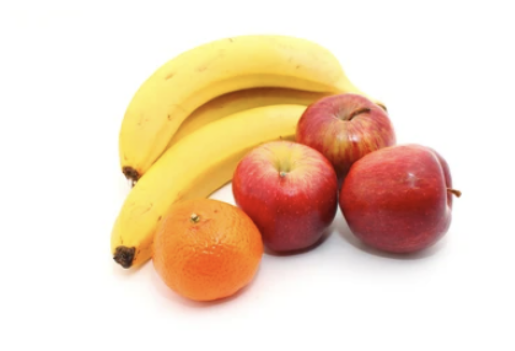

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = 'fruits2.png'
img = cv2.imread(image_path)

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [3]:
results = model(img)

# If only one image was processed, the results list will have one item
result = results[0]

# Use .show() on the result object
result.show()


0: 448x640 1 banana, 3 apples, 1 orange, 121.0ms
Speed: 7.1ms preprocess, 121.0ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)


In [27]:
class_names = model.names  # This returns a dictionary

# Get the predicted boxes
boxes = results[0].boxes  # Access the first result for boxes

# Find the apple class ID
apple_class_id = [id for id, name in class_names.items() if name == 'apple']

if apple_class_id:  # Check if apple class exists
    apple_class_id = apple_class_id[0]  # Get the first (and presumably only) class ID for apples

    # Count the number of apples detected
    apple_count = sum(1 for box in boxes if box.cls == apple_class_id)
    
    print(f"Number of apples detected: {apple_count}")
else:
    print("Apple class not found in the model.")

Number of apples detected: 3


In [4]:
class_names = model.names  # This returns a dictionary

# Get the predicted boxes
boxes = results[0].boxes  # Access the first result for boxes

# Dictionary to store the count of each fruit detected
fruit_counts = {}

# Iterate through each fruit class in the model
for class_id, class_name in class_names.items():
    # Count the number of detected boxes for each fruit class
    fruit_count = sum(1 for box in boxes if box.cls == class_id)
    
    if fruit_count > 0:  # If any boxes detected for this fruit
        fruit_counts[class_name] = fruit_count

# Print the results
if fruit_counts:
    for fruit, count in fruit_counts.items():
        print(f"Number of {fruit}s detected: {count}")
else:
    print("No fruits detected in the image.")


Number of bananas detected: 1
Number of apples detected: 3
Number of oranges detected: 1


In [ ]:
# Save the results
results.save(save_dir='path_to_save_results/')